In [1]:
## UDF for ADF test
from statsmodels.tsa.stattools import adfuller
import pandas as pd
import matplotlib.pyplot as plt

def adf_test(timeseries):
    print("Results of Dickey-Fuller Test:")
    dftest = adfuller(timeseries, autolag="AIC")
    dfoutput = pd.Series(
        dftest[0:4],
        index=[
            "Test Statistic",
            "p-value",
            "#Lags Used",
            "Number of Observations Used",
        ],
    )
    for key, value in dftest[4].items():
        dfoutput["Critical Value (%s)" % key] = value
    print(dfoutput)

In [2]:
log_ddf=pd.read_csv("../data/log_df.csv")
log_ddf.drop([0], inplace=True)
log_ddf.reset_index(inplace=True)
log_ddf.drop(['index'], axis=1, inplace=True)

In [6]:
adf_test(log_ddf['ip'][:100000])

Results of Dickey-Fuller Test:
Test Statistic                -1.042680e+01
p-value                        1.649659e-18
#Lags Used                     6.200000e+01
Number of Observations Used    9.993700e+04
Critical Value (1%)           -3.430415e+00
Critical Value (5%)           -2.861569e+00
Critical Value (10%)          -2.566785e+00
dtype: float64


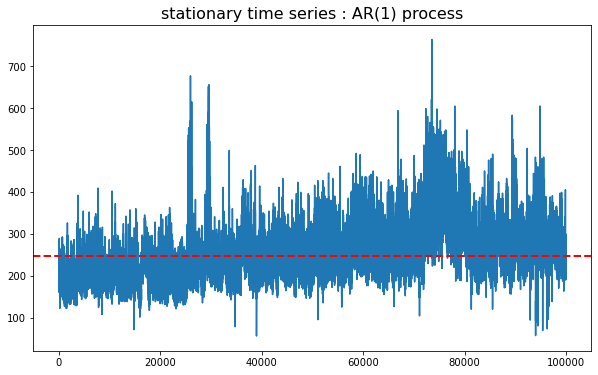

In [8]:
## plotting 
plt.rcParams['figure.figsize'] = (10, 6)
plt.plot(log_ddf['ip'][:100000])
plt.title("stationary time series : AR(1) process", fontsize=16)

## adding horizonal line at mean position 0 
plt.axhline(log_ddf['ip'][:100000].mean(), 0, 200, color='red', linestyle='--', linewidth=2) 
plt.show()

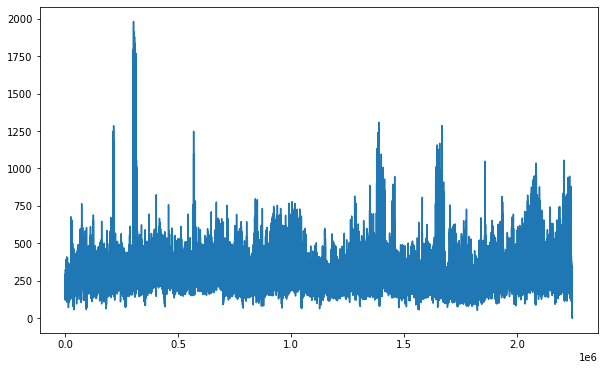

In [9]:
## plotting 
plt.rcParams['figure.figsize'] = (10, 6)
plt.plot(log_ddf['ip'])
plt.show()